<a href="https://colab.research.google.com/github/mervegb/deep-learning/blob/main/training_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def generate_data(num_samples, num_features, coef=5, intercept=3, noise=0.1):
    """Generate synthetic data based on a linear relationship"""
    x = np.random.rand(num_samples, num_features)
    y = coef * x + intercept + noise * np.random.rand(num_samples, num_features)
    return x, y

# Generate and convert training data
x_train, y_train = generate_data(100, 1)
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)

# Generate and convert evaluation (test) data
x_test, y_test = generate_data(50, 1)
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test)

In [62]:
class LinearRegressionModel(nn.Module):

  def __init__(self, inputSize,outputSize):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(inputSize,outputSize)

  def forward(self,x):
   return self.linear(x)

In [63]:
# Initialize lists to save the history of the training and test losses
train_loss_history = []
test_loss_history = []

#initialize the Model
inputDim = 1
outputDim = 1

model = LinearRegressionModel(inputDim,outputDim)

#the loss (mean squared error)
loss_function = nn.MSELoss()

#optimization (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

Epoch: 0 | Train loss: 23.1723 | Test loss: 24.9306
Epoch: 10 | Train loss: 14.0788 | Test loss: 15.4135
Epoch: 20 | Train loss: 8.6083 | Test loss: 9.6278
Epoch: 30 | Train loss: 5.3161 | Test loss: 6.0995
Epoch: 40 | Train loss: 3.3333 | Test loss: 3.9391
Epoch: 50 | Train loss: 2.1378 | Test loss: 2.6095
Epoch: 60 | Train loss: 1.4157 | Test loss: 1.7856
Epoch: 70 | Train loss: 0.9783 | Test loss: 1.2708
Epoch: 80 | Train loss: 0.7121 | Test loss: 0.9455
Epoch: 90 | Train loss: 0.5489 | Test loss: 0.7371


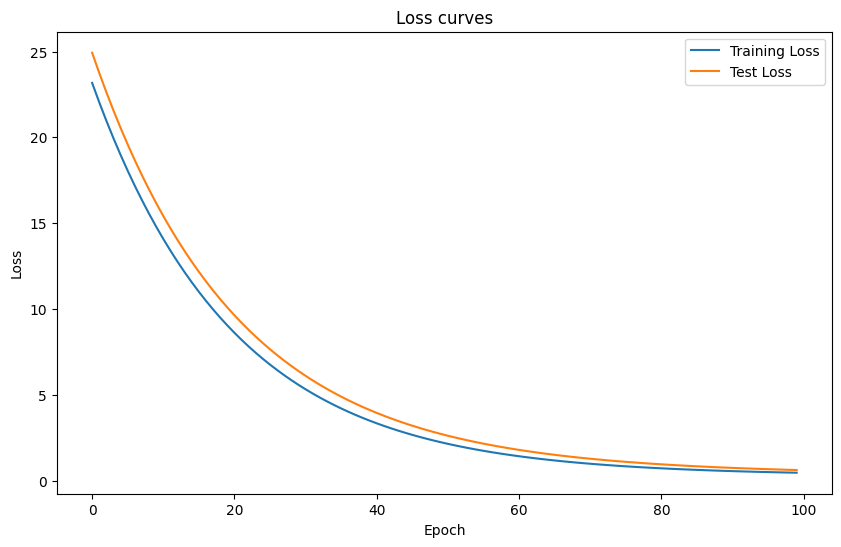

In [64]:
#train the model
n_epochs = 100

for epoch in range(n_epochs):

  model.train() # Switch to training mode
  optimizer.zero_grad() # Zero the gradients

  # Forward pass: compute predicted y by passing x to the model
  y_pred = model(x_train_tensor)

  # Compute loss
  loss = loss_function(y_pred, y_train_tensor)

  # Backward pass: compute gradient of the loss with respect to the model parameters
  loss.backward()

  # Update model parameters
  optimizer.step()

  # Evaluation
  model.eval() # Switch to evaluation mode

  with torch.no_grad():  # Deactivates autograd, reduces memory usage and speeds up computations
    y_pred = model(x_test_tensor) # Forward pass

    test_loss = loss_function(y_pred, y_test_tensor) # Compute the loss

    train_loss_history.append(loss.item())
    test_loss_history.append(test_loss.item())

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss.item():.4f} | Test loss: {test_loss.item():.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label="Training Loss")
plt.plot(test_loss_history, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss curves")
plt.show()


Epoch [10/100], Train Loss: 3.5340, Test Loss: 2.9349
Epoch [20/100], Train Loss: 1.0623, Test Loss: 1.1937
Epoch [30/100], Train Loss: 0.8476, Test Loss: 0.9478
Epoch [40/100], Train Loss: 0.6710, Test Loss: 0.7478
Epoch [50/100], Train Loss: 0.5255, Test Loss: 0.5840
Epoch [60/100], Train Loss: 0.4060, Test Loss: 0.4503
Epoch [70/100], Train Loss: 0.3085, Test Loss: 0.3418
Epoch [80/100], Train Loss: 0.2301, Test Loss: 0.2552
Epoch [90/100], Train Loss: 0.1682, Test Loss: 0.1870
Epoch [100/100], Train Loss: 0.1205, Test Loss: 0.1346


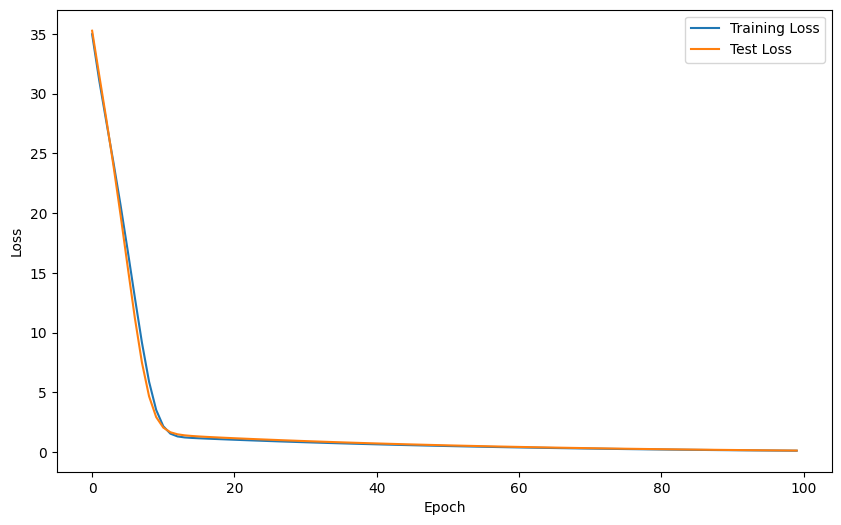

In [59]:
# Define the multi-layer model
class MultiLayerModel(nn.Module):
    def __init__(self):
        super(MultiLayerModel, self).__init__()
        self.layer1 = nn.Linear(1, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Generate random data for training and testing
x_train = np.random.rand(100, 1)
y_train = 5 * x_train + 3 + 0.1 * np.random.rand(100, 1)

x_test = np.random.rand(50, 1)
y_test = 5 * x_test + 3 + 0.1 * np.random.rand(50, 1)

# Convert data to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)

x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test)

# Initialize model, loss function, and optimizer
model = MultiLayerModel()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Initialize lists to save loss history
train_loss_history = []
test_loss_history = []

# Train the model
n_epochs = 100

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(x_test_tensor)
        test_loss = loss_function(y_pred_test, y_test_tensor)

    train_loss_history.append(loss.item())
    test_loss_history.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
